<a href="https://colab.research.google.com/github/monya217/curvetopia/blob/main/shape_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to add noise to simulate hand-drawn style
def jitter(points, noise_level=2):
    return points + np.random.normal(scale=noise_level, size=points.shape)

# Function to rotate points by a given angle (in degrees)
def rotate_points(x, y, angle):
    radians = np.deg2rad(angle)
    x_rot = np.cos(radians) * (x - 50) - np.sin(radians) * (y - 50) + 50
    y_rot = np.sin(radians) * (x - 50) + np.cos(radians) * (y - 50) + 50
    return x_rot, y_rot


def create_directory(path):
    if not os.path.exists(path):
        try:
            os.makedirs(path)
        except NotADirectoryError as e:
            print(f"Error: {e}. Please check the path: {path}")

# Function to create and save a shape image with rotation
def save_shape_image(x, y, shape_name, index, angle, save_dir='shapes'):
    x_rot, y_rot = rotate_points(x, y, angle)  # Rotate the shape

    plt.figure(figsize=(2, 2))
    plt.plot(x_rot, y_rot, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])  # Set axis limits to fit all shapes
    plt.axis('off')

    # Create directory if it doesn't exist
    shape_dir = os.path.join(save_dir, shape_name)
    create_directory(shape_dir)  # Use the directory creation function

    # Save the figure
    filename = os.path.join(shape_dir, f'{shape_name}_{index}_{angle}.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

# Shape creation functions
def create_circle(noise_level=0.5):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = 50 + 30 * np.cos(theta)
    y = 50 + 30 * np.sin(theta)
    return jitter(x, noise_level), jitter(y, noise_level)

def create_ellipse(noise_level=0.5):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = 50 + 40 * np.cos(theta)  # Major axis = 40
    y = 50 + 20 * np.sin(theta)  # Minor axis = 20
    return jitter(x, noise_level), jitter(y, noise_level)

def create_square(noise_level=2.5):
    x = np.array([20, 80, 80, 20, 20])
    y = np.array([20, 20, 80, 80, 20])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_rectangle(noise_level=2.5):
    x = np.array([20, 80, 80, 20, 20])
    y = np.array([30, 30, 70, 70, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_triangle(noise_level=2.5):
    x = np.array([50, 80, 20, 50])
    y = np.array([20, 80, 80, 20])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_pentagon(noise_level=2):
    theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)
    x = 50 + 30 * np.cos(theta)
    y = 50 + 30 * np.sin(theta)
    x = np.append(x, x[0])  # Closing the shape
    y = np.append(y, y[0])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_hexagon(noise_level=2):
    theta = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    x = 50 + 30 * np.cos(theta)
    y = 50 + 30 * np.sin(theta)
    x = np.append(x, x[0])  # Closing the shape
    y = np.append(y, y[0])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_trapezoid(noise_level=2.5):
    x = np.array([30, 70, 90, 10, 30])
    y = np.array([30, 30, 70, 70, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_parallelogram(noise_level=2.5):
    x = np.array([30, 70, 90, 50, 30])
    y = np.array([30, 30, 70, 70, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_rhombus(noise_level=2.5):
    x = np.array([50, 80, 50, 20, 50])
    y = np.array([20, 50, 80, 50, 20])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_kite(noise_level=2.5):
    x = np.array([50, 70, 50, 30, 50])
    y = np.array([20, 50, 80, 50, 20])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_arrow(noise_level=1.5):
    x = np.array([20, 50, 50, 80, 50, 50, 20, 20, 50])
    y = np.array([50, 50, 30, 60, 90, 70, 70, 50, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_cross(noise_level=1.5):
    x = np.array([30, 30, 50, 50, 70, 70, 50, 50, 30])
    y = np.array([30, 50, 50, 70, 70, 50, 50, 30, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_tick(noise_level=2.5):
    x = np.array([30, 50, 80])
    y = np.array([50, 70, 30])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_semicircle(noise_level=0.5):
    theta = np.linspace(0, np.pi, 100)
    x = 50 + 30 * np.cos(theta)
    y = 50 + 30 * np.sin(theta)
    x = np.append(x, [80, 20, 50])
    y = np.append(y, [50, 50, 50])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_crescent(noise_level=0.5):
    theta = np.linspace(0, 2 * np.pi, 100)
    x_outer = 50 + 30 * np.cos(theta)
    y_outer = 50 + 30 * np.sin(theta)
    x_inner = 50 + 20 * np.cos(theta + np.pi/6)  # Slight shift for a better crescent
    y_inner = 50 + 20 * np.sin(theta + np.pi/6)

    x_crescent = np.concatenate([x_outer, x_inner[::-1]])
    y_crescent = np.concatenate([y_outer, y_inner[::-1]])

    return jitter(x_crescent, noise_level), jitter(y_crescent, noise_level)

def create_cloud(noise_level=0.5):
    theta = np.linspace(0, 2 * np.pi, 100)
    x1 = 50 + 20 * np.cos(theta)
    y1 = 50 + 20 * np.sin(theta)
    x2 = 70 + 15 * np.cos(theta)
    y2 = 55 + 15 * np.sin(theta)
    x3 = 30 + 15 * np.cos(theta)
    y3 = 55 + 15 * np.sin(theta)

    # Combining circles to create a cloud-like shape
    x_cloud = np.concatenate([x1, x2, x3])
    y_cloud = np.concatenate([y1, y2, y3])

    return jitter(x_cloud, noise_level), jitter(y_cloud, noise_level)

def create_quatrefoil(noise_level=1.0):
    t = np.linspace(0, 2 * np.pi, 100)
    x = 50 + 30 * np.cos(t) * (1 + np.sin(4 * t))
    y = 50 + 30 * np.sin(t) * (1 + np.sin(4 * t))
    return jitter(x, noise_level), jitter(y, noise_level)

def create_polygon(noise_level=2, num_sides=7):
    theta = np.linspace(0, 2 * np.pi, num_sides, endpoint=False)
    x = 50 + 30 * np.cos(theta)
    y = 50 + 30 * np.sin(theta)
    x = np.append(x, x[0])  # Closing the shape
    y = np.append(y, y[0])
    return jitter(x, noise_level), jitter(y, noise_level)

def create_heart(noise_level=2):
    t = np.linspace(0, 2 * np.pi, 100)
    x = 50 + 16 * (np.sin(t) ** 3)
    y = 50 + 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)
    return jitter(x, noise_level), jitter(y, noise_level)

def create_star(noise_level=2):
    theta = np.linspace(0, 2 * np.pi, 5, endpoint=False)
    r = np.array([30, 10] * 5)
    x = 50 + r * np.cos(theta.repeat(2))
    y = 50 + r * np.sin(theta.repeat(2))

    # Closing the star shape by adding the starting point to the end
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    return jitter(x, noise_level), jitter(y, noise_level)

def create_line(noise_level=0, curvature_amplitude=0.5, num_points=20):
    x = np.linspace(20, 80, num_points)
    y = np.linspace(50, 50, num_points)

    # Add sinusoidal curvature to the line
    y += curvature_amplitude * np.sin(np.linspace(0, 2 * np.pi, num_points))

    # Add random jitter to make it more bumpy
    x = jitter(x, noise_level)
    y = jitter(y, noise_level)

    return x, y

# Generate and save the dataset with rotation
def generate_dataset(num_samples=100, noise_level=2, save_dir='shapes', num_rotations=4):
    shapes = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "quatrefoil": create_quatrefoil,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
    }

    for shape_name, shape_func in shapes.items():
        for i in range(num_samples):
            x, y = shape_func(noise_level)
            for j in range(num_rotations):
                angle = np.random.randint(0, 360)  # Random rotation angle
                save_shape_image(x, y, shape_name, i, angle, save_dir)

# Modify the save directory to your Google Drive path
save_dir = '/content/drive/My Drive/shapes'

# Generate the dataset with rotation and save to Google Drive
generate_dataset(num_samples=100, noise_level=0.5, save_dir=save_dir, num_rotations=4)

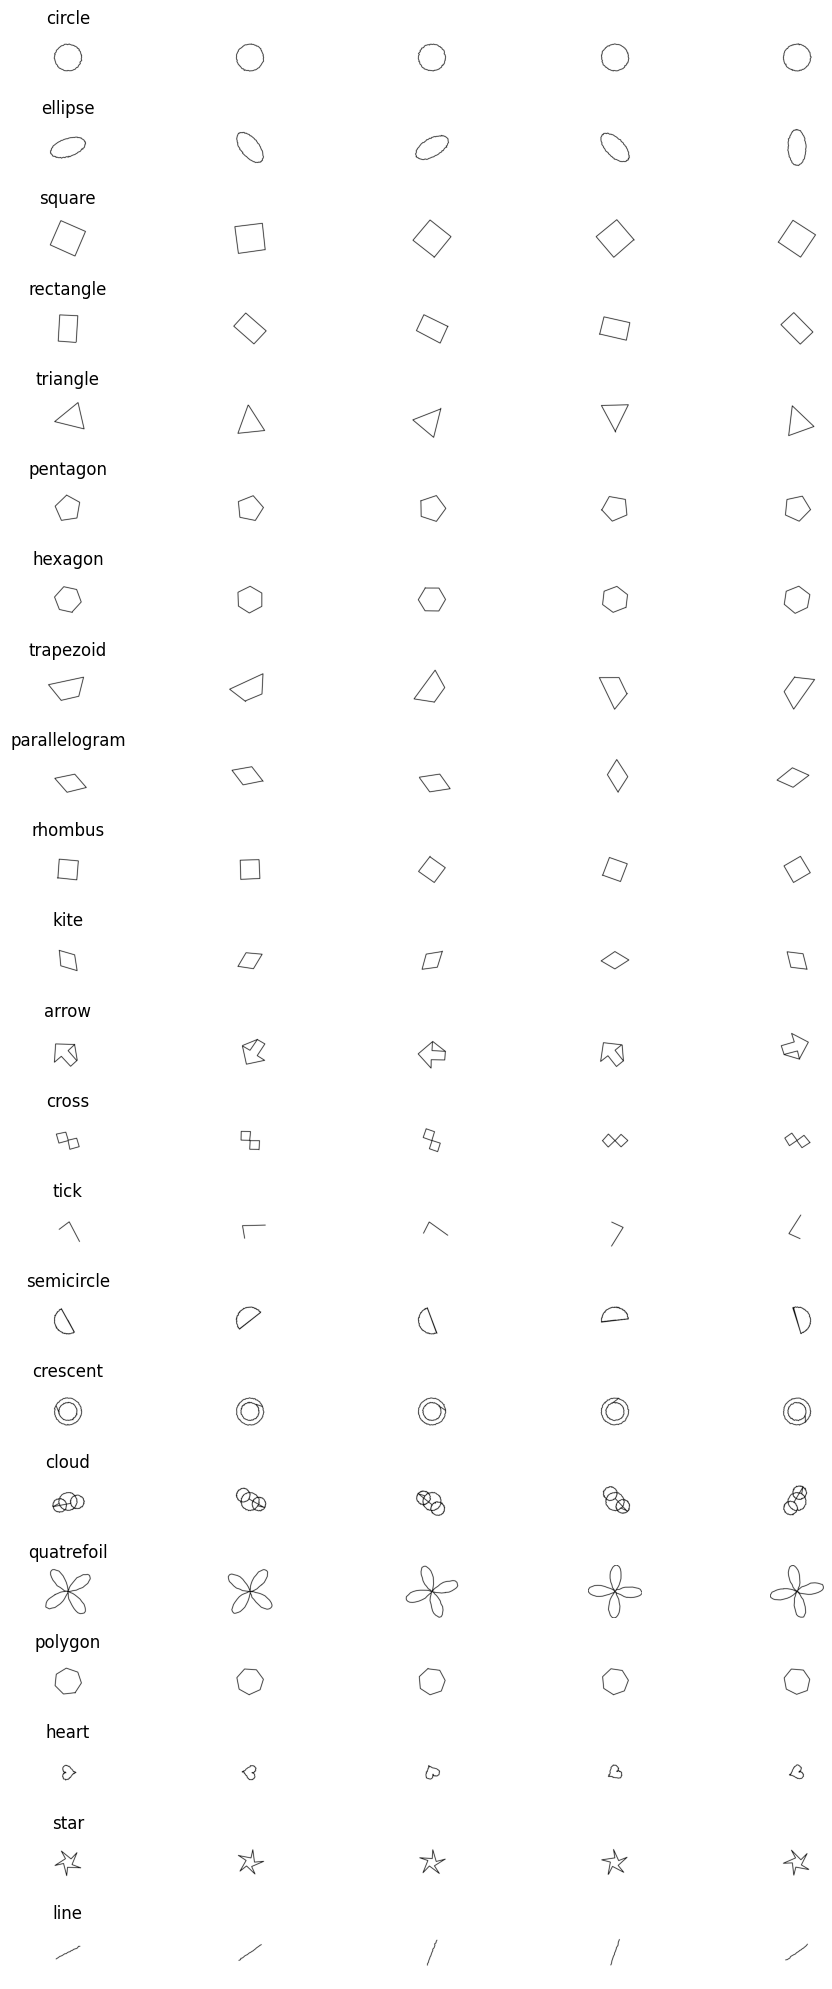

In [ ]:
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from google.colab import drive

# Function to visualize a few samples from each category
def visualize_dataset(dataset_dir='/content/drive/My Drive/shapes', num_samples=5):
    shape_categories = os.listdir(dataset_dir)

    plt.figure(figsize=(10, 20))

    for i, shape in enumerate(shape_categories):
        shape_dir = os.path.join(dataset_dir, shape)
        all_images = os.listdir(shape_dir)

        # Randomly select a few images from the current shape category
        selected_images = random.sample(all_images, min(num_samples, len(all_images)))

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(shape_dir, img_name)
            img = load_img(img_path)

            plt.subplot(len(shape_categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            if j == 0:
                plt.title(shape)

    plt.tight_layout()
    plt.show()

# Visualize the dataset
visualize_dataset('/content/drive/My Drive/shapes', num_samples=5)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths and parameters
dataset_dir = '/content/drive/My Drive/shapes'
img_height, img_width = 128, 128  # Resize images to this size
batch_size = 32

# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2,  # Use 20% of data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify this is the training data
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify this is the validation data
)

Found 7028 images belonging to 22 classes.
Found 1742 images belonging to 22 classes.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define paths
dataset_dir = '/content/drive/My Drive/shapes'
img_size = 64
batch_size = 32
num_classes = len(os.listdir(dataset_dir))  # Number of shape categories

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy:.2f}')

# Save the model
model.save('shape_classifier_model.h5')

# Make predictions on new data
# Example usage: model.predict(new_image)


Found 7015 images belonging to 22 classes.
Found 1742 images belonging to 22 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


220/220 ━━━━━━━━━━━━━━━━━━━━ 44s 166ms/step - accuracy: 0.2783 - loss: 2.3260 - val_accuracy: 0.9707 - val_loss: 0.1385
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 140ms/step - accuracy: 0.8486 - loss: 0.4025 - val_accuracy: 0.9954 - val_loss: 0.0262
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.9178 - loss: 0.2205 - val_accuracy: 0.9989 - val_loss: 0.0243
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.9391 - loss: 0.1639 - val_accuracy: 0.9960 - val_loss: 0.0209
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 43s 158ms/step - accuracy: 0.9457 - loss: 0.1518 - val_accuracy: 0.9948 - val_loss: 0.0230
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.9530 - loss: 0.1301 - val_accuracy: 0.9943 - val_loss: 0.0204
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 36s 137ms/step - accuracy: 0.9490 - loss: 0.1400 - val_accuracy: 0.9960 - val_loss: 0.0158
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 34s 153ms/step - accuracy: 0.9630 - loss: 0.1019 - val

Validation Accuracy: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


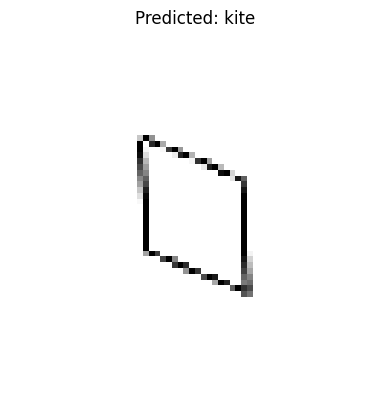

Predicted Class: kite


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('shape_classifier_model.h5')

def predict_and_visualize(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_name = list(train_generator.class_indices.keys())
    predicted_class = class_name[class_idx]

    # Plot the image and prediction
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class

# Example usage
image_path = '/content/drive/MyDrive/shapes/kite/kite_0_215.png'  # Replace with the path to your test image
predicted_class = predict_and_visualize(image_path)
print(f'Predicted Class: {predicted_class}')


In [ ]:
def generate_clean_shape(shape_name, save_dir='clean_shapes'):
    # Define clean versions of the shapes
    shape_funcs = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
        "quatrefoil": create_quatrefoil,
    }

    if shape_name not in shape_funcs:
        raise ValueError(f"Shape '{shape_name}' not recognized.")

    # Generate a clean shape without noise
    clean_func = shape_funcs[shape_name]
    x, y = clean_func(noise_level=0)  # Generate without noise

    # Save the clean shape image
    plt.figure(figsize=(2, 2))
    plt.plot(x, y, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])
    plt.axis('off')

    # Create directory if it doesn't exist
    shape_dir = os.path.join(save_dir, shape_name)
    os.makedirs(shape_dir, exist_ok=True)

    # Save the clean image
    filename = os.path.join(shape_dir, f'{shape_name}_clean.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    return filename


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


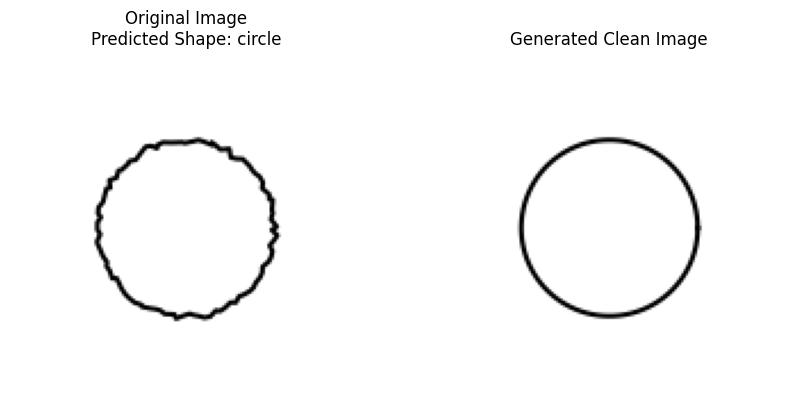

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the image size used during training
image_size = (64, 64)  # This should match the target_size used in ImageDataGenerator

# Load the trained model
model = load_model('shape_classifier_model.h5')

def predict_shape(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    # Assuming you have the class indices available
    # If you do not have `train_generator`, replace this with the class names list
    class_name = list(train_generator.class_indices.keys())
    return class_name[class_idx]

def generate_clean_shape(shape_name, save_dir='clean_shapes'):
    # Define the shape generation functions here
    shape_funcs = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
        "quatrefoil": create_quatrefoil,
    }

    if shape_name not in shape_funcs:
        raise ValueError(f"Shape '{shape_name}' not recognized.")

    clean_func = shape_funcs[shape_name]
    x, y = clean_func(noise_level=0)

    plt.figure(figsize=(2, 2))
    plt.plot(x, y, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])
    plt.axis('off')

    shape_dir = os.path.join(save_dir, shape_name)
    os.makedirs(shape_dir, exist_ok=True)

    filename = os.path.join(shape_dir, f'{shape_name}_clean.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    return filename

def process_image(image_path):
    shape_name = predict_shape(image_path)
    clean_image_path = generate_clean_shape(shape_name)
    return shape_name, clean_image_path

def display_comparison(image_path):
    shape_name, clean_image_path = process_image(image_path)

    # Load the original image
    original_img = image.load_img(image_path)

    # Load the generated clean image
    clean_img = plt.imread(clean_image_path)

    # Plot both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\nPredicted Shape: {shape_name}')
    axes[0].axis('off')

    # Display the clean image
    axes[1].imshow(clean_img)
    axes[1].set_title('Generated Clean Image')
    axes[1].axis('off')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/shapes/circle/circle_10_75.png'
display_comparison(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


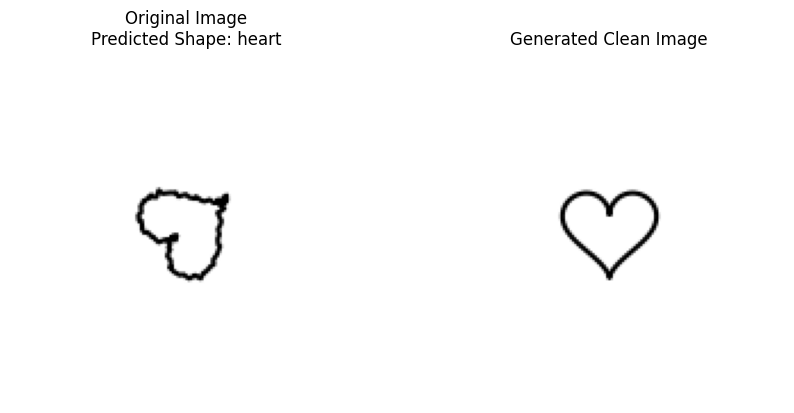

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the image size used during training
image_size = (64, 64)  # This should match the target_size used in ImageDataGenerator

# Load the trained model
model = load_model('shape_classifier_model.h5')

def predict_shape(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    # Assuming you have the class indices available
    # If you do not have `train_generator`, replace this with the class names list
    class_name = list(train_generator.class_indices.keys())
    return class_name[class_idx]

def generate_clean_shape(shape_name, save_dir='clean_shapes'):
    # Define the shape generation functions here
    shape_funcs = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
        "quatrefoil": create_quatrefoil,
    }

    if shape_name not in shape_funcs:
        raise ValueError(f"Shape '{shape_name}' not recognized.")

    clean_func = shape_funcs[shape_name]
    x, y = clean_func(noise_level=0)

    plt.figure(figsize=(2, 2))
    plt.plot(x, y, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])
    plt.axis('off')

    shape_dir = os.path.join(save_dir, shape_name)
    os.makedirs(shape_dir, exist_ok=True)

    filename = os.path.join(shape_dir, f'{shape_name}_clean.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    return filename

def process_image(image_path):
    shape_name = predict_shape(image_path)
    clean_image_path = generate_clean_shape(shape_name)
    return shape_name, clean_image_path

def display_comparison(image_path):
    shape_name, clean_image_path = process_image(image_path)

    # Load the original image
    original_img = image.load_img(image_path)

    # Load the generated clean image
    clean_img = plt.imread(clean_image_path)

    # Plot both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\nPredicted Shape: {shape_name}')
    axes[0].axis('off')

    # Display the clean image
    axes[1].imshow(clean_img)
    axes[1].set_title('Generated Clean Image')
    axes[1].axis('off')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/shapes/heart/heart_10_127.png'
display_comparison(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


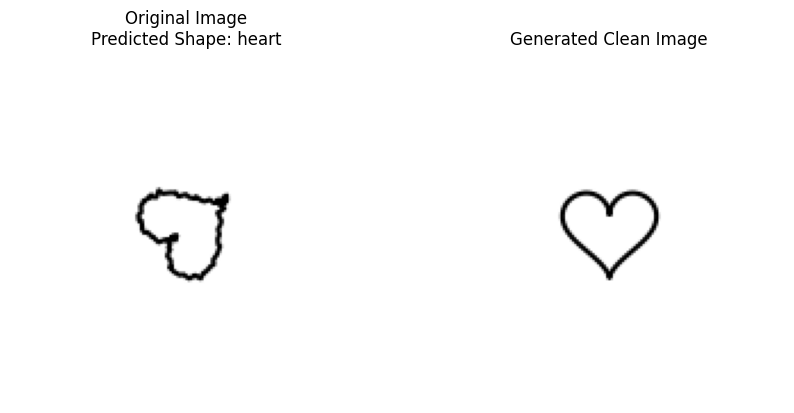

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the image size used during training
image_size = (64, 64)  # This should match the target_size used in ImageDataGenerator

# Load the trained model
model = load_model('shape_classifier_model.h5')

def predict_shape(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    # Assuming you have the class indices available
    # If you do not have `train_generator`, replace this with the class names list
    class_name = list(train_generator.class_indices.keys())
    return class_name[class_idx]

def generate_clean_shape(shape_name, save_dir='clean_shapes'):
    # Define the shape generation functions here
    shape_funcs = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
        "quatrefoil": create_quatrefoil,
    }

    if shape_name not in shape_funcs:
        raise ValueError(f"Shape '{shape_name}' not recognized.")

    clean_func = shape_funcs[shape_name]
    x, y = clean_func(noise_level=0)

    plt.figure(figsize=(2, 2))
    plt.plot(x, y, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])
    plt.axis('off')

    shape_dir = os.path.join(save_dir, shape_name)
    os.makedirs(shape_dir, exist_ok=True)

    filename = os.path.join(shape_dir, f'{shape_name}_clean.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    return filename

def process_image(image_path):
    shape_name = predict_shape(image_path)
    clean_image_path = generate_clean_shape(shape_name)
    return shape_name, clean_image_path

def display_comparison(image_path):
    shape_name, clean_image_path = process_image(image_path)

    # Load the original image
    original_img = image.load_img(image_path)

    # Load the generated clean image
    clean_img = plt.imread(clean_image_path)

    # Plot both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\nPredicted Shape: {shape_name}')
    axes[0].axis('off')

    # Display the clean image
    axes[1].imshow(clean_img)
    axes[1].set_title('Generated Clean Image')
    axes[1].axis('off')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/shapes/heart/heart_10_127.png'
display_comparison(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


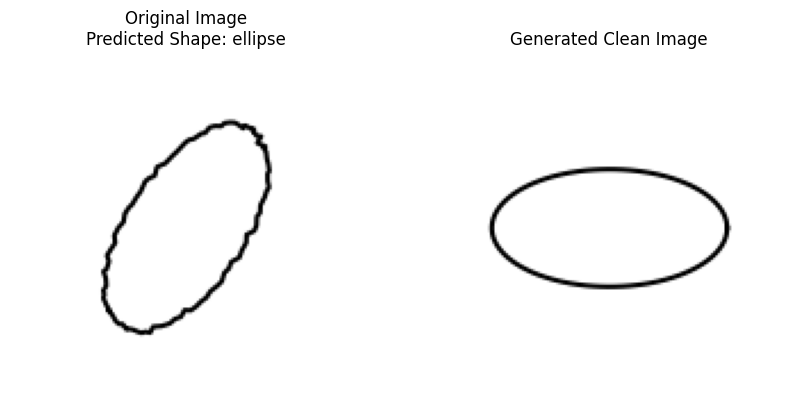

In [ ]:
import cairosvg
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import io
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Define the image size used during training
image_size = (64, 64)  # This should match the target_size used in ImageDataGenerator

# Load the trained model
model = load_model('shape_classifier_model.h5')


# Conversion Functions
def convert_svg_to_png(svg_path, png_path):
    cairosvg.svg2png(url=svg_path, write_to=png_path)

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    unique_shapes = np.unique(np_path_XYs[:, 0])
    path_XYs = []

    for shape_id in unique_shapes:
        npXYs = np_path_XYs[np_path_XYs[:, 0] == shape_id][:, 1:]
        XYs = []
        for path_id in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == path_id][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)

    return path_XYs

def save_paths_as_png(paths_XYs, save_path, figsize=(6, 12), colors=None):
    fig, ax = plt.subplots(tight_layout=True, figsize=figsize)

    if colors is None:
        colors = plt.cm.viridis(np.linspace(0, 1, len(paths_XYs)))

    for i, XYs in enumerate(paths_XYs):
        c = colors[i % len(colors)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def csv_to_image(csv_path, output_path):
    paths_XYs = read_csv(csv_path)
    save_paths_as_png(paths_XYs, output_path)

def convert_file_to_png(file_path, output_path):
    ext = os.path.splitext(file_path)[1].lower()
    if ext == '.svg':
        convert_svg_to_png(file_path, output_path)
    elif ext == '.csv':
        csv_to_image(file_path, output_path)
    elif ext == '.png':
        # Simply copy the PNG file if it's already in the correct format
        os.rename(file_path, output_path)
    else:
        raise ValueError("Unsupported file format. Only SVG, CSV, and PNG are supported.")

# Shape Prediction and Generation
def predict_shape(image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    # Assuming you have the class indices available
    # If you do not have `train_generator`, replace this with the class names list
    class_name = list(train_generator.class_indices.keys())
    return class_name[class_idx]

def generate_clean_shape(shape_name, save_dir='clean_shapes'):
    # Define the shape generation functions here
    shape_funcs = {
        "circle": create_circle,
        "ellipse": create_ellipse,
        "square": create_square,
        "rectangle": create_rectangle,
        "triangle": create_triangle,
        "pentagon": create_pentagon,
        "hexagon": create_hexagon,
        "trapezoid": create_trapezoid,
        "parallelogram": create_parallelogram,
        "rhombus": create_rhombus,
        "kite": create_kite,
        "arrow": create_arrow,
        "cross": create_cross,
        "tick": create_tick,
        "semicircle": create_semicircle,
        "crescent": create_crescent,
        "cloud": create_cloud,
        "polygon": create_polygon,
        "heart": create_heart,
        "star": create_star,
        "line": create_line,
        "quatrefoil": create_quatrefoil,
    }

    if shape_name not in shape_funcs:
        raise ValueError(f"Shape '{shape_name}' not recognized.")

    clean_func = shape_funcs[shape_name]
    x, y = clean_func(noise_level=0)

    plt.figure(figsize=(2, 2))
    plt.plot(x, y, 'k')
    plt.axis('equal')
    plt.axis([-10, 110, -10, 110])
    plt.axis('off')

    shape_dir = os.path.join(save_dir, shape_name)
    os.makedirs(shape_dir, exist_ok=True)

    filename = os.path.join(shape_dir, f'{shape_name}_clean.png')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

    return filename

# Full Image Processing Pipeline
def process_image(image_path):
    # Convert to PNG if necessary
    png_path = os.path.splitext(image_path)[0] + '.png'
    convert_file_to_png(image_path, png_path)

    # Predict the shape
    shape_name = predict_shape(png_path)

    # Generate the clean shape image
    clean_image_path = generate_clean_shape(shape_name)
    return shape_name, png_path, clean_image_path

def regularize(image_path):
    shape_name, original_image_path, clean_image_path = process_image(image_path)

    # Load the original image
    original_img = Image.open(original_image_path)

    # Load the generated clean image
    clean_img = plt.imread(clean_image_path)

    # Plot both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the original image
    axes[0].imshow(original_img)
    axes[0].set_title(f'Original Image\nPredicted Shape: {shape_name}')
    axes[0].axis('off')

    # Display the clean image
    axes[1].imshow(clean_img)
    axes[1].set_title('Generated Clean Image')
    axes[1].axis('off')

    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/shapes/ellipse/ellipse_0_56.png'
regularize(image_path)
